In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#loading dataset
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

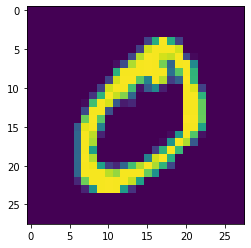

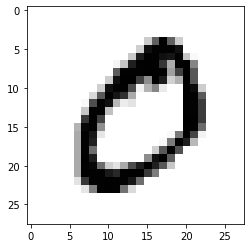

In [ ]:
#data preprocessing
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train[1], cmap = plt.cm.binary)

In [ ]:
#before normalizing the data
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

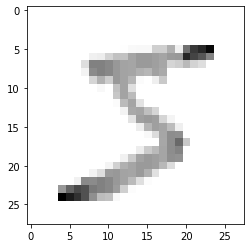

In [ ]:

#normalizing the data
x_train =tf.keras.utils.normalize(x_train,axis=1)
x_test =tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [ ]:
#after normalization
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#resizing the image
imag_size =28
x_trains = np.array(x_train).reshape(-1,imag_size,imag_size,1)
x_tests = np.array(x_test).reshape(-1,imag_size,imag_size,1)
print("dimension of  training samples",x_trains.shape)
print("dimension of testing samples",x_tests.shape)

dimension of  training samples (60000, 28, 28, 1)
dimension of testing samples (10000, 28, 28, 1)


In [ ]:
#building model in cnn
cnn=tf.keras.models.Sequential()
# First Layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding="same", activation="relu", input_shape=[28,28,1]))
#MaxPoolingLayer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2, padding='valid'))
# second Layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding="same", activation="relu"))
#MaxPoolingLayer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2, padding='valid'))
# Flattening Layer
cnn.add(tf.keras.layers.Flatten())
# Droput Layer
# Adding the first fully connected layer
cnn.add(tf.keras.layers.Dense(units= 64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(tf.keras.layers.Dense(10,activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
pt=cnn.fit(x_trains,y_train, validation_split=0.3,epochs = 5)

Epoch 1/5
1313/1313 [==============================] - 26s 11ms/step - loss: 0.2876 - accuracy: 0.9115 - val_loss: 0.0887 - val_accuracy: 0.9724
Epoch 2/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.1041 - accuracy: 0.9693 - val_loss: 0.0552 - val_accuracy: 0.9833
Epoch 3/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0767 - accuracy: 0.9767 - val_loss: 0.0541 - val_accuracy: 0.9838
Epoch 4/5
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0569 - accuracy: 0.9829 - val_loss: 0.0536 - val_accuracy: 0.9843
Epoch 5/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0482 - accuracy: 0.9854 - val_loss: 0.0432 - val_accuracy: 0.9874


In [ ]:
cnn.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


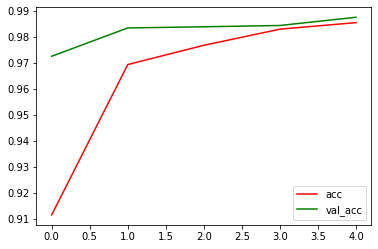

In [ ]:
# Plot accuracy per iteration
plt.plot(pt.history['accuracy'], label='acc', color='red')
plt.plot(pt.history['val_accuracy'], label='val_acc', color='green')
plt.legend() 


In [ ]:
cnn.evaluate(x_tests,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0361 - accuracy: 0.9887


[0.03610854223370552, 0.9886999726295471]

In [ ]:
predictions = cnn.predict([x_tests])
print(predictions)
y_pred_label = np.argmax(predictions,axis = 1)
print(y_pred_label)

[[9.2027982e-11 4.9680566e-09 1.7840134e-07 ... 9.9999833e-01
  7.1063583e-10 8.7596254e-07]
 [3.4813725e-06 8.2866090e-06 9.9998736e-01 ... 7.6310005e-07
  2.1498404e-10 1.0999788e-13]
 [4.5751822e-11 9.9999940e-01 2.1929099e-09 ... 8.6558444e-08
  1.3483275e-07 1.7614410e-09]
 ...
 [1.1037179e-11 1.5647439e-06 7.9288728e-11 ... 1.3067781e-08
  1.5457637e-06 1.0207189e-05]
 [1.4930437e-11 5.8695453e-13 2.2028570e-12 ... 1.0037884e-11
  5.6226112e-05 1.6436934e-10]
 [5.9691579e-06 1.4680428e-10 5.1433169e-08 ... 3.7154739e-09
  4.4830654e-06 2.3128146e-09]]
[7 2 1 ... 4 5 6]


In [ ]:
c_matrix=tf.math.confusion_matrix(labels = y_test , predictions= y_pred_label)
c_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1129,    1,    2,    0,    0,    2,    0,    1,    0],
       [   1,    0, 1024,    1,    1,    0,    0,    3,    2,    0],
       [   0,    0,    4, 1001,    0,    2,    0,    0,    3,    0],
       [   1,    0,    1,    0,  969,    0,    1,    1,    2,    7],
       [   2,    0,    0,    4,    0,  883,    2,    0,    0,    1],
       [   3,    2,    1,    0,    1,    3,  945,    0,    3,    0],
       [   0,    4,    7,    5,    1,    0,    0, 1008,    1,    2],
       [   4,    0,    1,    0,    2,    1,    0,    1,  961,    4],
       [   4,    2,    0,    1,    4,    3,    0,    3,    2,  990]],
      dtype=int32)>

Text(69.0, 0.5, 'Actual')

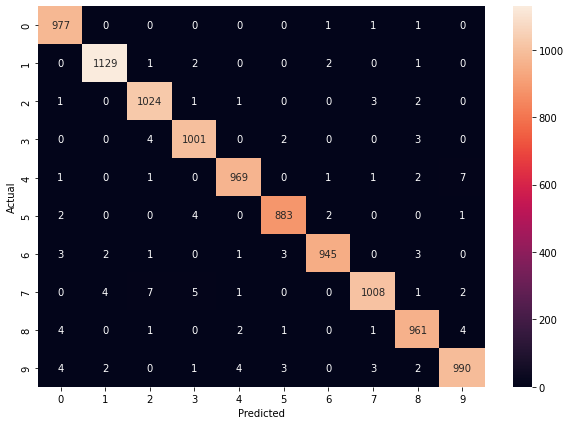

In [ ]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(c_matrix,annot =True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(np.argmax(predictions[476]))

1


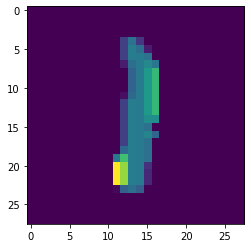

In [ ]:
plt.imshow(x_test[476])

In [ ]:
print(np.argmax(predictions[3]))

0


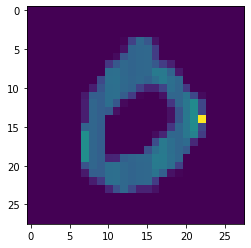

In [ ]:
plt.imshow(x_test[3])

In [ ]:
#on custom data
import cv2

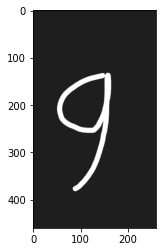

In [ ]:
img = cv2.imread('/content/9.jpg')
plt.imshow(img)

In [ ]:
img.shape

(460, 260, 3)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

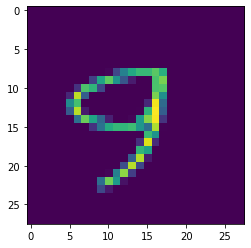

In [ ]:
plt.imshow(resized)

In [ ]:
new=tf.keras.utils.normalize(resized,axis=1)


In [ ]:
new=np.array(new).reshape(-1,imag_size,imag_size,1)

In [ ]:
new.shape

(1, 28, 28, 1)

In [ ]:
predictions=cnn.predict(new)

In [ ]:
print(np.argmax(predictions))

9
